In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
dataset = pd.read_csv("laptop_price.csv",encoding='unicode_escape')
print(dataset.head())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [57]:
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [58]:
dataset.dropna(inplace=True)
dataset = pd.get_dummies(dataset, columns=['Company', 'Product', 'ScreenResolution', 'TypeName', 'Memory', 'Cpu' ,'Gpu', 'OpSys'], drop_first=True)
dataset['Ram'] = dataset['Ram'].str.replace('GB', '').astype(int)
dataset['Weight'] = dataset['Weight'].str.replace('kg', '').astype(float)
print(dataset.head())

   laptop_ID  Inches  Ram  Weight  Price_euros  Company_Apple  Company_Asus  \
0          1    13.3    8    1.37      1339.69           True         False   
1          2    13.3    8    1.34       898.94           True         False   
2          3    15.6    8    1.86       575.00          False         False   
3          4    15.4   16    1.83      2537.45           True         False   
4          5    13.3    8    1.37      1803.60           True         False   

   Company_Chuwi  Company_Dell  Company_Fujitsu  ...  Gpu_Nvidia Quadro M620  \
0          False         False            False  ...                   False   
1          False         False            False  ...                   False   
2          False         False            False  ...                   False   
3          False         False            False  ...                   False   
4          False         False            False  ...                   False   

   Gpu_Nvidia Quadro M620M  OpSys_Chrome OS 

In [59]:
X = dataset.drop(['Price_euros','laptop_ID'], axis=1)
y = dataset['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1042
261
1042
261


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared value: {r2:.2f}')

Mean Squared Error: 81249.39
R-squared value: 0.84


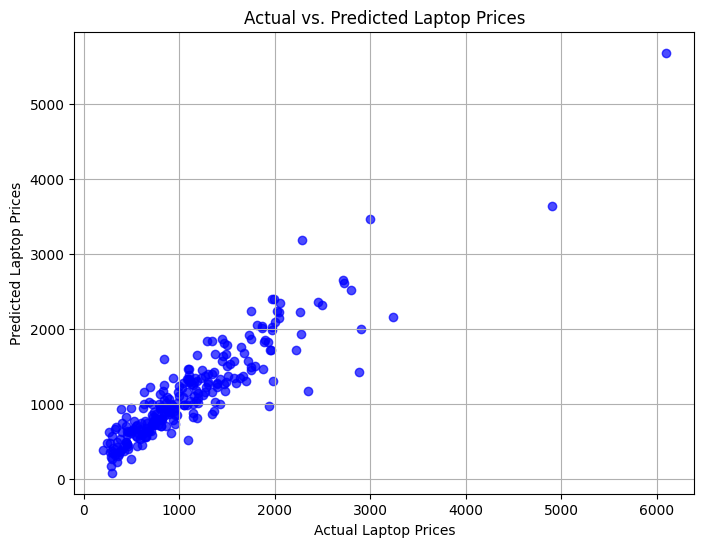

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Laptop Prices')
plt.ylabel('Predicted Laptop Prices')
plt.title('Actual vs. Predicted Laptop Prices')
plt.grid(True)
plt.show()